In [7]:
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define datasets for AND and OR gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # Inputs
y_and = np.array([[0], [0], [0], [1]]) # AND gate outputs
y_or = np.array([[0], [1], [1], [1]])  # OR gate outputs

# Function to create and train ANN 
def train_logic_gate(X, y, gate_name):
    model = Sequential()
    model.add(Dense(units=1, activation='sigmoid', input_dim=2)) 
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
    model.fit(X, y, epochs=100, verbose=0)
    loss, accuracy = model.evaluate(X, y, verbose=0) 
    print(f"{gate_name} Gate Accuracy: {accuracy:.2f}") 
    predictions = np.round(model.predict(X)) 
    print(f"{gate_name} Gate Predictions:\n{predictions}")

# Train AND gate 
train_logic_gate(X, y_and, "AND")

# Train OR gate
train_logic_gate(X, y_or, "OR")# Visualizing the clusters 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X') 
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.show()


AND Gate Accuracy: 0.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
AND Gate Predictions:
[[0.]
 [0.]
 [0.]
 [0.]]
OR Gate Accuracy: 0.25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
OR Gate Predictions:
[[1.]
 [0.]
 [1.]
 [0.]]


NameError: name 'X_scaled' is not defined

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping # Load dataset

boston = fetch_openml(name="Boston", version=1, as_frame=True) 
data = boston.data
data['Price'] = boston.target

# Split dataset into features and target 
X = data.drop('Price', axis=1).values 
y = data['Price'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

# Define ANN model 
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # Single neuron for regression
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) # Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Train the model
model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Boston Housing Dataset Mean Absolute Error: {mae:.2f}")


D:\PY Projects\CIFAR10_Adversarial\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - loss: 597.5878 - mean_absolute_error: 22.4081 - val_loss: 515.9016 - val_mean_absolute_error: 21.0521
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 558.8073 - mean_absolute_error: 21.5335 - val_loss: 477.9262 - val_mean_absolute_error: 20.1665
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 514.2775 - mean_absolute_error: 20.5165 - val_loss: 433.7188 - val_mean_absolute_error: 19.0858
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 462.9511 - mean_absolute_error: 19.2737 - val_loss: 381.2182 - val_mean_absolute_error: 17.7175
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 401.3237 - mean_absolute_error: 17.7042 - val_loss: 319.0127 - val_mean_absolute_error: 15.9857
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 328.8829 - mean_absolute_error: 15.7758 - val_loss: 249.1927 - val_mean_absolute_error: 13.9472
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 252

In [10]:
# Import necessary libraries
from tensorflow.keras.datasets import mnist

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize data
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0 
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

print("Data preprocessing complete.") 
print(f"Training data shape: {X_train.shape}") 
print(f"Testing data shape: {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 146s 13us/step
Data preprocessing complete.
Training data shape: (60000, 784)
Testing data shape: (10000, 784)


D:\PY Projects\CIFAR10_Adversarial\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9091 - loss: 0.3151 - val_accuracy: 0.9517 - val_loss: 0.1628
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9612 - loss: 0.1327 - val_accuracy: 0.9642 - val_loss: 0.1230
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9722 - loss: 0.0913 - val_accuracy: 0.9685 - val_loss: 0.1044
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9799 - loss: 0.0659 - val_accuracy: 0.9703 - val_loss: 0.1016
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9833 - loss: 0.0532 - val_accuracy: 0.9704 - val_loss: 0.1014
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9869 - loss: 0.0418 - val_accuracy: 0.9675 - val_loss: 0.1109
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9890 - loss: 0.0342 - val_accuracy: 0.9730 - val_loss: 0.0965
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 

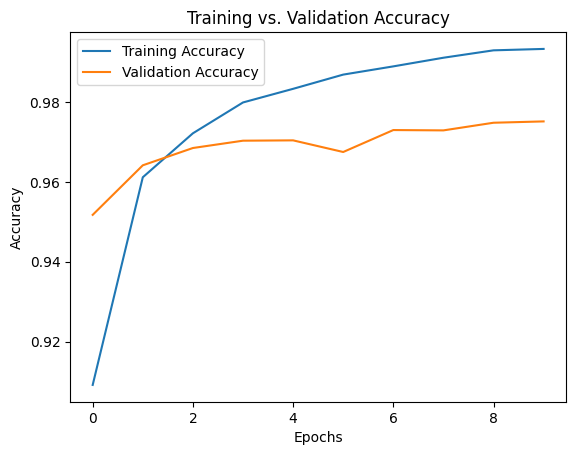

In [4]:
# Import necessary libraries
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0 
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

# Define the MLP model 
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2) 

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test) 
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training vs. validation accuracy 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

In [13]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1, 1, 0]) 
model = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', random_state=42)
model.fit(X, y)
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
y_pred, accuracy

(array([1, 1, 1, 0]), 1.0)

D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5008 - loss: 0.6966 - val_accuracy: 0.6748 - val_loss: 0.5720
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6967 - loss: 0.5545 - val_accuracy: 0.7317 - val_loss: 0.4943
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7536 - loss: 0.4905 - val_accuracy: 0.7561 - val_loss: 0.4638
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7775 - loss: 0.4692 - val_accuracy: 0.7561 - val_loss: 0.4488
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7786 - loss: 0.4345 - val_accuracy: 0.7805 - val_loss: 0.4345
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7874 - loss: 0.4533 - val_accuracy: 0.7724 - val_loss: 0.4336
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8039 - loss: 0.4155 - val_accuracy: 0.7724 - val_loss: 0.4314
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7944 - loss: 0.4032 - val_accuracy: 0.

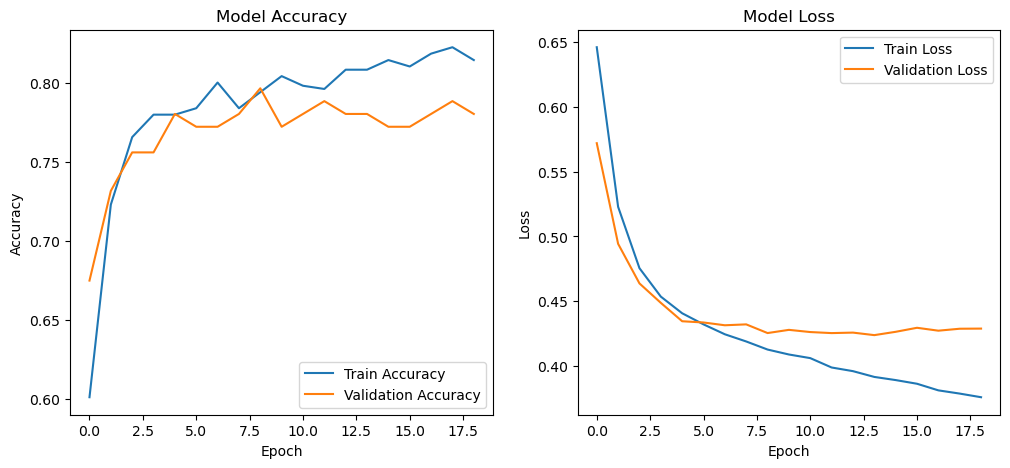

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.median(), inplace=True)
scaler = StandardScaler()
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=100, batch_size=10,
                    validation_split=0.2, callbacks=[early_stopping], verbose=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [16]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1, 1, 0])
def evaluate_activation_function(activation):
    model = MLPClassifier(hidden_layer_sizes=(2,), activation=activation, solver='lbfgs', random_state=42)
    start_time = time.time()
    model.fit(X, y)
    training_time = time.time() - start_time
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    return accuracy, training_time
relu_accuracy, relu_training_time = evaluate_activation_function('relu')
tanh_accuracy, tanh_training_time = evaluate_activation_function('tanh')
sigmoid_accuracy, sigmoid_training_time = evaluate_activation_function('logistic')
(relu_accuracy, relu_training_time), (tanh_accuracy, tanh_training_time), (sigmoid_accuracy, sigmoid_training_time)

((0.75, 0.008963823318481445),
 (1.0, 0.024745941162109375),
 (1.0, 0.02697896957397461))

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist, cifar10, mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
def load_and_preprocess_data(dataset):
    if dataset == 'fashion_mnist':
        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    elif dataset == 'cifar10':
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    elif dataset == 'mnist':
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
    else:
        raise ValueError("Unsupported dataset")
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    if dataset == 'cifar10':
        x_train = np.mean(x_train, axis=-1)
        x_test = np.mean(x_test, axis=-1)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return (x_train, y_train), (x_test, y_test)
def build_mlp_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def train_and_evaluate_model(dataset):
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data(dataset)
    input_shape = x_train.shape[1:]
    num_classes = y_train.shape[1]
    model = build_mlp_model(input_shape, num_classes)
    model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    return test_accuracy
fashion_mnist_accuracy = train_and_evaluate_model('fashion_mnist')
cifar10_accuracy = train_and_evaluate_model('cifar10')
mnist_accuracy = train_and_evaluate_model('mnist')
print("Fashion MNIST Accuracy:", fashion_mnist_accuracy)
print("CIFAR-10 Accuracy:", cifar10_accuracy)
print("MNIST Accuracy:", mnist_accuracy)

D:\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7651 - loss: 0.6695 - val_accuracy: 0.8485 - val_loss: 0.4110
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8620 - loss: 0.3808 - val_accuracy: 0.8709 - val_loss: 0.3561
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8816 - loss: 0.3234 - val_accuracy: 0.8776 - val_loss: 0.3469
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8879 - loss: 0.3036 - val_accuracy: 0.8743 - val_loss: 0.3442
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8964 - loss: 0.2797 - val_accuracy: 0.8813 - val_loss: 0.3329
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8982 - loss: 0.2697 - val_accuracy: 0.8708 - val_loss: 0.3599
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9070 - loss: 0.2511 - val_accuracy: 0.8849 - val_loss: 0.3346
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9100 - loss: 0.2351 - val_acc

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return (x_train, y_train), (x_test, y_test)
def build_mlp_model(input_shape, num_classes, additional_layer=False):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dense(256, activation='relu')
    ])
    if additional_layer:
        model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def train_and_evaluate_model(additional_layer=False):
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
    input_shape = x_train.shape[1:]
    num_classes = y_train.shape[1]
    model = build_mlp_model(input_shape, num_classes, additional_layer)
    model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    return test_accuracy
original_accuracy = train_and_evaluate_model(additional_layer=False)
additional_layer_accuracy = train_and_evaluate_model(additional_layer=True)
print("Original Architecture Accuracy:", original_accuracy)
print("Additional Layer Architecture Accuracy:", additional_layer_accuracy)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7678 - loss: 0.6593 - val_accuracy: 0.8582 - val_loss: 0.3991
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8629 - loss: 0.3777 - val_accuracy: 0.8717 - val_loss: 0.3566
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8762 - loss: 0.3343 - val_accuracy: 0.8711 - val_loss: 0.3529
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8885 - loss: 0.3006 - val_accuracy: 0.8816 - val_loss: 0.3297
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8920 - loss: 0.2838 - val_accuracy: 0.8879 - val_loss: 0.3138
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9017 - loss: 0.2649 - val_accuracy: 0.8831 - val_loss: 0.3208
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9043 - loss: 0.2553 - val_accuracy: 0.8796 - val_loss: 0.3339
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9093 - loss: 0.2427 - val_accu